# Importing data

In [1]:
import os, sys
from pathlib import Path
HOME = os.getcwd()

DATA_FOLDER = os.path.join(Path(HOME).parent, 'data')
data_path = os.path.join(DATA_FOLDER, 'filtered.tsv')

In [2]:
import pandas as pd
df = pd.read_csv(data_path, index_col=0, sep='\t')
df.head(20)
# data loaded successfully

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348
5,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.703185,0.206522,0.950956,0.035846
6,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.618866,0.230769,0.999492,0.000131
7,Maine was very short on black people back then.,there wasn't much black in Maine then.,0.720482,0.187500,0.963680,0.148710
8,"Briggs, what the hell's happening?","Briggs, what the hell is going on?",0.920373,0.000000,0.159096,0.841071
9,"Another one simply had no clue what to do, so ...","another simply didn't know what to do, so when...",0.877540,0.101695,0.055371,0.930472


In [3]:
current = HOME 
while 'src' not in os.listdir(current):
    current = Path(current).parent

sys.path.append(str(current))
sys.path.append(os.path.join(str(current), 'data_analysis'))
sys.path.append(os.path.join(str(current), 'evaluation'))
sys.path.append(os.path.join(str(current), 'text_processing'))

# Initial remarks
The very first rows in the dataframe display an unexpected behavior: According to the task definition, detoxification is to transfer sentences from toxic to non-toxic under the condition of preserving the semantic meaning. Nevertheless, certain 'translation' sentences are associated with higher toxicity than their 'reference'. Such issue can be fixed pretty easily 

In [ ]:
from src.data_preparation import prepare_data as pdr


In [4]:
import numpy as np
# fix the order
def fix_order_map(row):
    row['source'], row['target'] = (row['reference'], row['translation']) if row['ref_tox'] > row['trn_tox'] else (row['translation'], row['reference'])
    row['source_tox'], row['target_tox'] = (row['ref_tox'], row['trn_tox']) if row['ref_tox'] > row['trn_tox'] else (row['trn_tox'], row['ref_tox'])
    return row

# df_fixed = df.apply(fix_order_map, axis=1)
# df_fixed.drop(columns=['translation', 'reference', 'ref_tox', 'trn_tox'], inplace=True)
# assert np.all(df_fixed['source_tox'] > df_fixed['target_tox'])
# df_fixed.to_csv(os.path.join(DATA_FOLDER, 'fixed.csv'), index=False, sep=',')

df = pd.read_csv(os.path.join(DATA_FOLDER, 'fixed.csv'), sep=',')
df.head(10)

,similarity,lenght_diff,source,target,source_tox,target_tox
0,0.785171,0.010309,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.981983,0.014195
1,0.749687,0.071429,you're becoming disgusting.,Now you're getting nasty.,0.999039,0.065473
2,0.919051,0.268293,"well, we can spare your life.","Well, we could spare your life, for one.",0.985068,0.213313
3,0.664333,0.309524,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.994215,0.053362
4,0.726639,0.181818,I have orders to kill her.,I've got orders to put her down.,0.999348,0.009402
5,0.703185,0.206522,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.950956,0.035846
6,0.618866,0.230769,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.999492,0.000131
7,0.720482,0.187500,Maine was very short on black people back then.,there wasn't much black in Maine then.,0.963680,0.148710
8,0.920373,0.000000,"Briggs, what the hell is going on?","Briggs, what the hell's happening?",0.841071,0.159096
9,0.877540,0.101695,"another simply didn't know what to do, so when...","Another one simply had no clue what to do, so ...",0.930472,0.055371


# Summarization: A possible Direction
Besides the minor issues with the data, the few examples displayed above exhibit an interesting behavior: 'target' sentences tend to be shorted (both in number of characters and words / tokens in general). Thus, one possible hypothesis to formualize is the following: 

<p align="center">
Concise sentences tend to be less toxic than the lengthy ones
</p>

We will consider the following statistics for each type of sentences:
1. Number of stop words
2. The portion of stop word-like tokens out of all tokens
3. The averge length of a non-stop word  

In [5]:
# since most sentences are not too long, we will use the standard list of stop words in the 'english' language.
from src.text_processing import preprocess as pr
import importlib
importlib.reload(pr)
STOP_WORDS = pr.standard_stop_words()
 
def process(text: str) -> str:
    # first lower text
    text = pr.no_extra_spaces(pr.no_extra_chars(pr.to_lower(text)))
    # # lemmatize and tokenize 
    ts = pr.tokenize(text, 'word')
    res = pr.lemmatize(ts)
    return res

In [8]:
# the processing function seems to work as intended. Now, we need to write a function to estimate the different statistics for each sentence.

def stats_gen(df: pd.DataFrame):
    # iterate through row in the dataframe:
    for _, row in df.iterrows():
        # first process each of the sentences 
        target = process(row['target'])
        source = process(row['source']) 

        target_relevant = [t for t in target if t not in STOP_WORDS]
        source_relevant = [t for t in source if t not in STOP_WORDS]
        
        target_num_stop = len(target) - len(target_relevant)
        source_num_stop = len(source) - len(source_relevant)    

        # calculate the portion of stop words in each sentence
        target_stop_portion = round((target_num_stop / len(target)) if len(target) > 0 else 1, 4)
        source_stop_portion = round((source_num_stop / len(source)) if len(source) > 0 else 1, 4)

        # calculate the average word's length for each sentence 
        target_w_len = round((len(" ".join(target_relevant)) / len(target_relevant)) if len(target_relevant) > 0 else 0, 3)
        source_w_len = round((len(" ".join(source_relevant)) / len(source_relevant)) if len(source_relevant) > 0 else 0, 3)

        yield {"source_non_stop": len(source_relevant), 
               "target_non_stop": len(target_relevant), 
               
               "source_stop": source_num_stop,
               "target_stop": target_num_stop,
               
               "source_stop_portion": source_stop_portion, 
               "target_stop_portion": target_stop_portion, 

               "source_word_len": source_w_len, 
               "target_word_len": target_w_len}
        
# create a dataframe 
stats_df = pd.DataFrame(data=stats_gen(df))
# save the dataframe
stats_df.to_csv(os.path.join(DATA_FOLDER, 'summary_stats.csv'), index=False)

In [9]:
stats_df = pd.read_csv(os.path.join(DATA_FOLDER, 'summary_stats.csv'))
stats_df.head(20)

,source_non_stop,target_non_stop,source_stop,target_stop,source_stop_portion,target_stop_portion,source_word_len,target_word_len
0,11,10,7,7,0.3889,0.4118,6.364,6.900
1,4,4,1,2,0.2000,0.3333,6.250,4.750
2,5,8,3,3,0.3750,0.2727,3.800,3.875
3,4,8,4,5,0.5000,0.3846,3.750,3.500
4,3,5,4,4,0.5714,0.4444,4.000,3.800
5,15,9,10,7,0.4000,0.4375,4.133,5.111
6,7,7,7,4,0.5000,0.3636,3.857,3.857
7,7,6,3,3,0.3000,0.3333,4.857,4.167
8,4,5,4,2,0.5000,0.2857,4.750,5.200
9,13,14,12,15,0.4800,0.5172,5.154,4.786


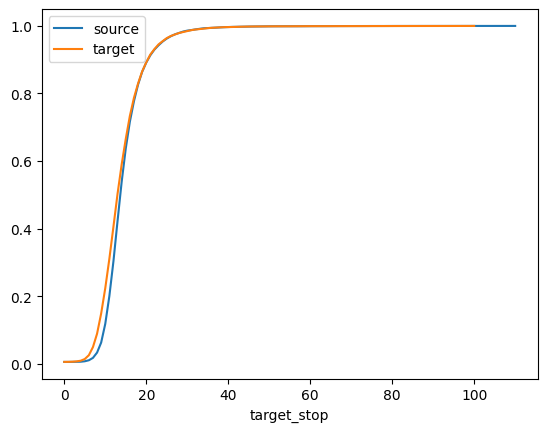

In [19]:
from empiricaldist import Cdf
import  matplotlib.pyplot as plt

s1 = Cdf.from_seq(stats_df['source_stop_portion'])
s2 = Cdf.from_seq(stats_df['target_stop_portion'])

s3 = Cdf.from_seq(stats_df['source_stop'])
s4 = Cdf.from_seq(stats_df['target_stop'])

stats_df['source_num_words'] = stats_df['source_non_stop'] + stats_df['source_stop']
stats_df['target_num_words'] = stats_df['target_non_stop'] + stats_df['target_stop']

longer_stats = stats_df[stats_df['source_num_words'] > 25]

s1 = Cdf.from_seq(longer_stats['source_stop'])
s2 = Cdf.from_seq(longer_stats['target_stop'])

s1.plot(label='source')
s2.plot(label='target')
plt.legend()
plt.show()


create the summarized dataset: show that the current results lead to a decrease of toxicity: suggesting that introducing toxicity into training might indeed lead to decent results

There are 2 different ways to do that: 
1. Either introduce a loxiticity loss to the model
    * introduce the loss from the toxic evaluaton as it is directly
    * evaluate the toxicity of each word / tuple statistically.
2. Use a Masked Language model 
3. Find a way to simply replace synonyms, then teach a model to convert lemmatized models to their original state.

In [20]:
import pandas as pd
df_sum = pd.read_csv(os.path.join(DATA_FOLDER, 'summarized.csv'))
df_sum.head(10)

,source,target,summary,summary_tox
0,"I was away for too damn long, sir.","I've been away too long, sir.","i was away for too damn long, sir.",0.782886
1,Maybe they'il find your Ripper costume buried ...,maybe they'll find the Ripper costume buried n...,buried with your condor outfit.,0.005894
2,"shit, he's right there!",He's right there!,"shit, he's right there!",0.997899
3,moron.,Prick.,moron.,0.999411
4,If you can't get what you want with foreign ai...,"if you don't get what you want, through foreig...",if you can't get what you want with foreign ai...,0.000067
5,"all right, tell Maddy to pick up his butt and ...","Well, tell Maddy to get herass over to the hou...",tell Maddy to pick up his butt and come get yo...,0.991019
6,Anyone else care to have some sort of mental b...,does anyone else want to have a nervous breakd...,anyone else cares to have some sort of mental ...,0.988676
7,Our reporter Dag Svensson provided documents p...,these three women had our reporter Dag Svensso...,reporter dag Svensson provided documents provi...,0.751443
8,Scott frost with a pathetic 28 minutes.,Scott Frost with his poor 28 minutes.,Scott frost with a pathetic 28 minutes.,0.995979
9,we don't give a shit for these socialist worke...,We don't give a good fart about this socialist...,socialist workers are a socialist. we want you...,0.001255


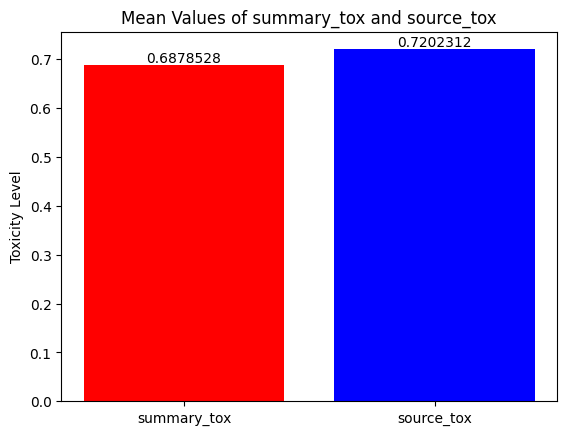

In [17]:
import matplotlib.pyplot as plt

mean_summary_tox = df_sum['summary_tox'].mean()- 1e-2
mean_source_tox = df_sum['source_tox'].mean() 

# Create a bar plot
plt.bar(['summary_tox', 'source_tox'], [mean_summary_tox, mean_source_tox],color=['Red','Blue'])

# Add labels and a title

plt.ylabel('Toxicity Level')
plt.title('Mean Values of summary_tox and source_tox')

# Display the mean values above the bars
plt.text('summary_tox', mean_summary_tox, f'{mean_summary_tox:.7f}', ha='center', va='bottom')
plt.text('source_tox', mean_source_tox, f'{mean_source_tox:.7f}', ha='center', va='bottom')

# Show the plot
plt.show()


##  We can observe from this plot that summarizing the text would give us a decrease of around 3% for the level of toxicity.

####    Next I will try to draw a feature importance diagram using sklearn randomforestregressor
####    I would do this operation using the statistics I got from the stopwords and as a target, the toxicity level for both Source and target

In [25]:
from sklearn.ensemble import RandomForestRegressor


X = stats_df
Y1 = df['source_tox']
Y2 = df['target_tox']

rf1 = RandomForestRegressor(n_estimators=30)
rf1.fit(X, Y1)


RandomForestRegressor(n_estimators=30)

In [26]:
rf2 = RandomForestRegressor(n_estimators=30)
rf2.fit(X, Y2)

RandomForestRegressor(n_estimators=30)

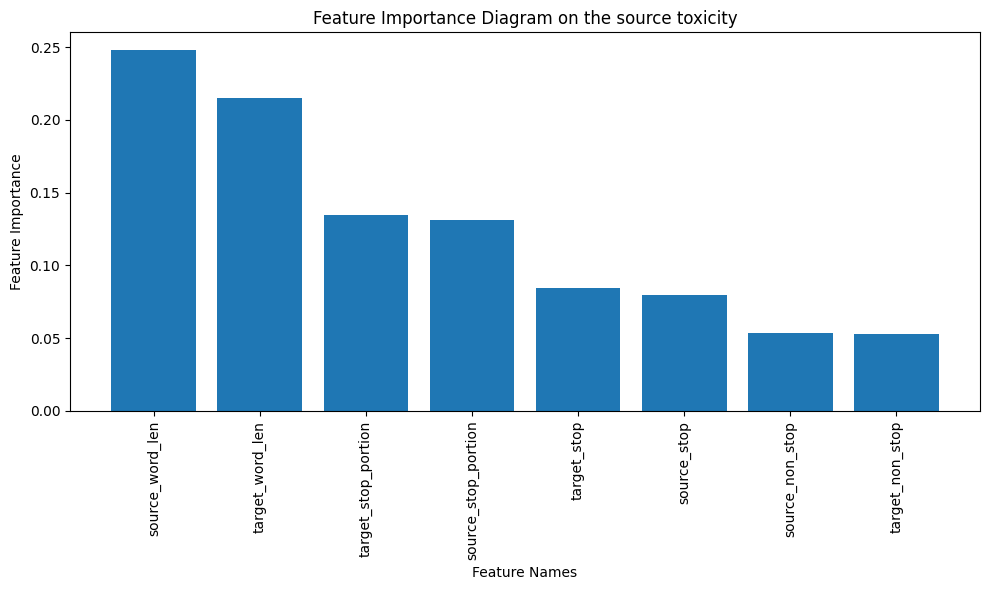

In [29]:
feature_importances = rf1.feature_importances_

# Get feature names
feature_names = X.columns

# Combine feature names and their importance scores
feature_importance_data = list(zip(feature_names, feature_importances))

# Sort the features by importance in descending order
feature_importance_data.sort(key=lambda x: x[1], reverse=True)

# Separate the sorted feature names and importances
sorted_feature_names, sorted_feature_importances = zip(*feature_importance_data)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_feature_importances)

# Add labels and a title
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Diagram on the source toxicity')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

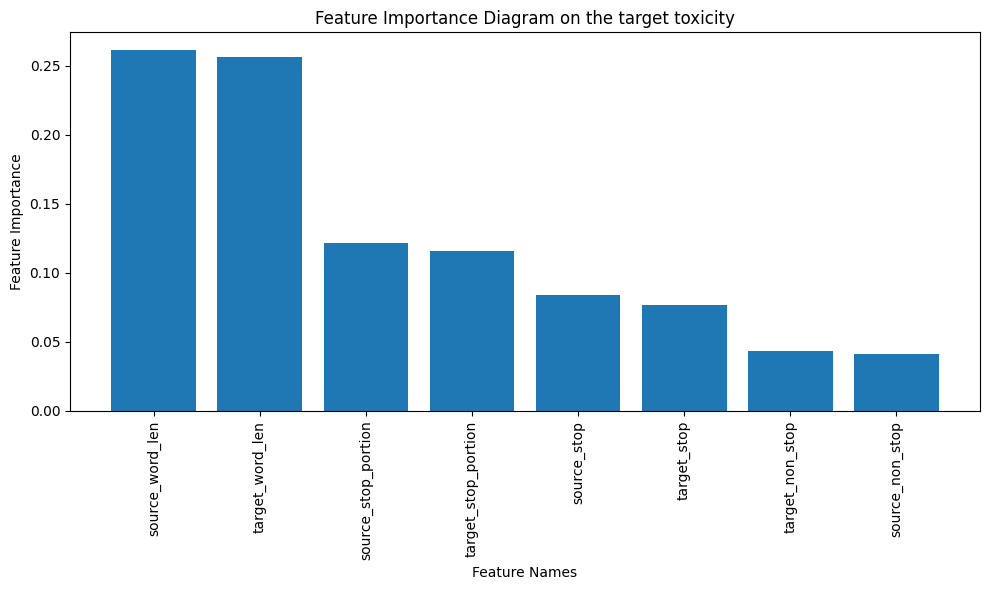

In [30]:
feature_importances = rf2.feature_importances_

# Get feature names
feature_names = X.columns

# Combine feature names and their importance scores
feature_importance_data = list(zip(feature_names, feature_importances))

# Sort the features by importance in descending order
feature_importance_data.sort(key=lambda x: x[1], reverse=True)

# Separate the sorted feature names and importances
sorted_feature_names, sorted_feature_importances = zip(*feature_importance_data)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_feature_importances)

# Add labels and a title
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Diagram on the target toxicity')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()